In [2]:
# This cell just imports relevant modules

import numpy
import pylab
from sympy import sin, cos, exp, ln, Function, Symbol, diff, integrate, limit, oo, series, factorial
from math import pi
import mpmath
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
###### SEQUENCES ######
###### Lecture 6, slide 10 ######
# Finite sequence example. The elements of the sequence are stored in a list
finite_sequence = [2*k for k in range(1, 5)] 
# Remember: range(A,B) generates integers from A up to B-1, so we need to use B=5 here

In [ ]:
###### CONVERGENCE OF SEQUENCES ######
###### Lecture 6, slide 11, 13, 14 ######
k = Symbol('k')
print("As k->infinity, the sequence {k} tends to: %f" % limit(k, k, oo) ) 
# The 'oo' here is SymPy's notation for infinity

print("As k->infinity, the sequence {1/k} tends to: %f" % limit(1.0/k, k, oo)) 

print("As k->infinity, the sequence {exp(1/k)} tends to: %f" % limit(exp(1.0/k), k, oo)) 

print("As k->infinity, the sequence {(k**3 + 2*k - 4)/(k**3 + 1)} tends to: %f" 
      % limit((k**3 + 2*k - 4)/(k**3 + 1), k, oo)) 

In [ ]:
###### SERIES ######
###### Lecture 6, slide 15 ######
# Using list comprehension:
print("The sum of 3*k + 1 (from k=0 to k=4) is: %f" % sum([3*k + 1 for k in range(0,5)])) 
# Note: we could also use the nsum function (part of the module mpmath): 
# import mpmath
# print mpmath.nsum(lambda k: 3*k + 1, [0, 4])

x = 1
print("The sum of (x**k)/(k!) from k=0 to k=4, with x = 1, is: %f" % sum([x**k/factorial(k) for k in range(1,5)])) 

In [ ]:
###### ARITHMETIC PROGRESSION ######
###### Lecture 6, slide 18 ######
print("The sum of 5 + 4*k up to the 11th term (i.e. up to k=10) is: %f" % sum([5 + 4*k for k in range(0,11)])) 

In [ ]:
###### GEOMETRIC PROGRESSION ######
###### Lecture 6, slide 21 ######
print("The sum of 3**k up to the 7th term (i.e. up to k=6) is: %f" % sum([3**k for k in range(0,7)])) 

In [ ]:
###### INFINITE SERIES ######
###### Lecture 6, slide 23, 24, 25 ######
print("The sum of the infinite series sum(1/(2**k)) is: %f" % mpmath.nsum(lambda k: 1/(2**k), [1, mpmath.inf]))  
print("The sum of the infinite alternating series sum(((-1)**(k+1))/k) is: %f" 
      % mpmath.nsum(lambda k: ((-1)**(k+1))/k, [1, mpmath.inf])) 

In [ ]:
###### RATIO TEST ######
###### Lecture 6, slide 27 ######
# A divergent example
k = Symbol('k')
f = (2**k)/(3*k)
f1 = (2**(k+1))/(3*(k+1))
ratio = f1/f

lim = limit(ratio, k, oo) 
print("As k -> infinity, the ratio tends to: %f" % lim) 
if(lim < 1.0):
    print("The series converges") 
elif(lim > 1.0):
    print("The series diverges") 
else:
    print("The series either converges or diverges") 

# A converging example
f = (2**k)/(5**k)
f1 = (2**(k+1))/(5**(k+1))
ratio = f1/f

In [ ]:
###### POWER SERIES ######
###### Lecture 6, slide 30 ######
k = Symbol('k')
x = Symbol('x')

a = 1.0/k
f = a*(x**k)

a1 = 1.0/(k+1)
f1 = a1*(x**(k+1))

ratio = abs(a/a1)
R = limit(ratio, k, oo)
print("The radius of convergence (denoted R) is: %f" % R) 

x = 0.5
if(abs(x) < 1):
    print("The series converges for |x| = %f (< R)" % abs(x)) 
elif(abs(x) > 1):
    print("The series diverges for |x| = %f (> R)" % abs(x)) 
else:
    print("The series either converges or diverges for |x| = %f (== R)\n" % abs(x)) 

In [ ]:
###### USEFUL SERIES ######
###### Lecture 6, slide 34 ######
x = Symbol('x')
r = Symbol('r')

# Note: the optional argument 'n' allows us to truncate the series
# after a certain order of x has been reached.
print("1/(1+x) = ", series(1.0/(1.0+x), x, n=4)) 
print("1/(1-x) = ", series(1.0/(1.0-x), x, n=4)) 
print("ln(1+x) = ", series(ln(1.0+x), x, n=4)) 
print("exp(x) = ", series(exp(x), x, n=4)) 
print("cos(x) = ", series(cos(x), x, n=7)) 
print("sin(x) = ", series(sin(x), x, n=8)) 

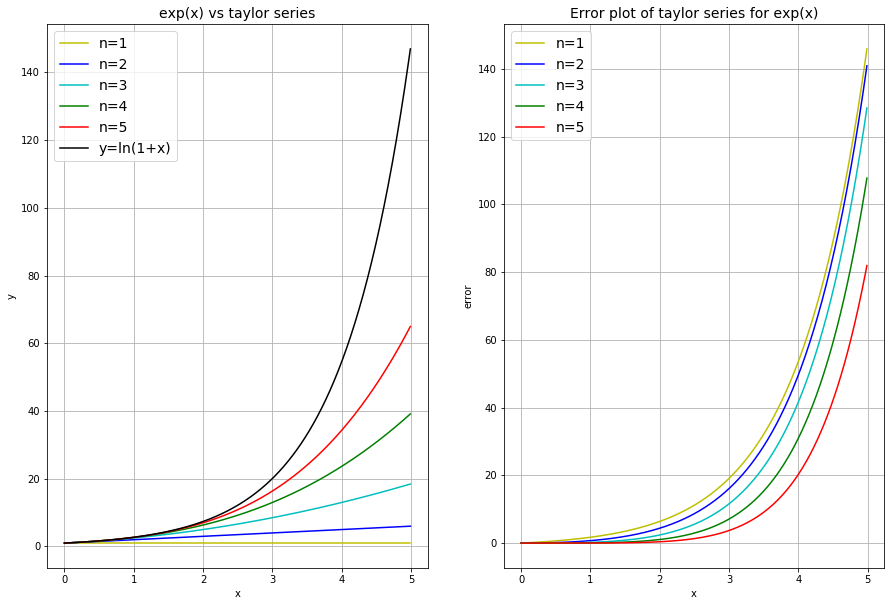

In [34]:
### plot taylor series for exp(x) with different number of terms n

def exp_taylor(x, n):
    y = 0
    for i in range(n):
        y += x**i / factorial(i) # taylor series for exp(x)
    return y


x = numpy.array([0.01*i for i in range(0, 500)]) # x between 0 and 5

expx = numpy.exp(x) # actual function

n = numpy.array([i for i in range(1, 6)]) # number of terms between 1 and 5

y_exp = numpy.zeros((len(n), len(x)))
for i in range(len(n)):
    y_exp[i] = exp_taylor(x, n[i]) # values from taylor series

exp_error = numpy.zeros((len(n), len(x)))
for i in range(len(n)):
    for j in range(len(x)):
        exp_error[i][j] = abs(y_exp[i][j] - expx[j]) # calculate difference between taylor series and function
         
colour = ['y', 'b', 'c', 'g', 'r']           

plt.figure(figsize=(15,10))

plt.subplot(121)
for i in range(len(n)):
    plt.plot(x, y_exp[i], colour[i], label='n=%.d' % (n[i]))
plt.plot(x, expx, 'k', label='y=ln(1+x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('exp(x) vs taylor series', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.grid(True)

plt.subplot(122)
for i in range(len(n)):
    plt.plot(x, exp_error[i], colour[i], label='n=%.d' % (n[i]))
plt.xlabel('x')
plt.ylabel('error')
plt.title('Error plot of taylor series for exp(x)', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.grid(True)

plt.show()

### more terms = closer to actual function = more accurate
### more accurate as x approaches 0

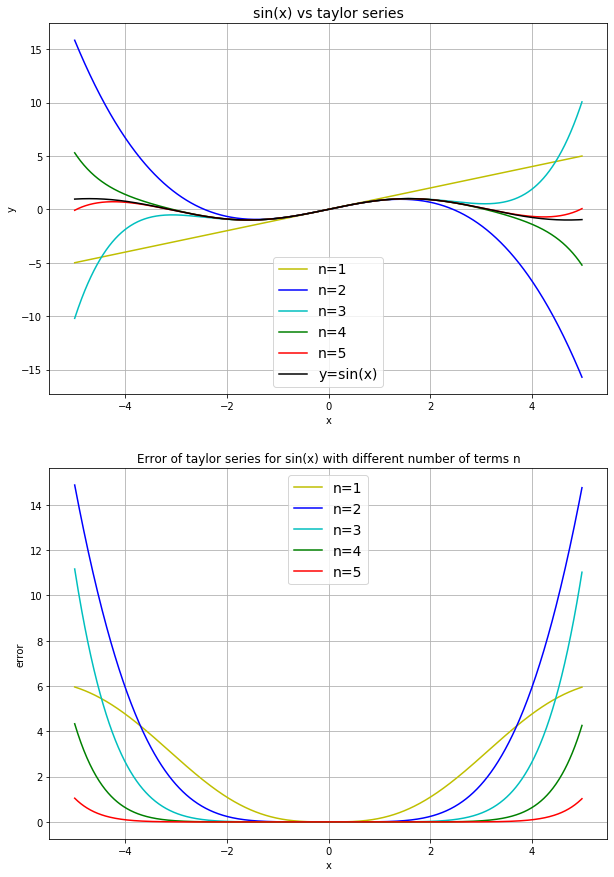

In [41]:
### plot taylor series for sin(x) with different number of terms n

def sin_taylor(x, n):
    y = 0
    for i in range(n):
        y += (-1)**(i)*(x**(2*i+1) / factorial(2*i+1)) # taylor series for sin(x)
    return y

x = numpy.array([0.01*i for i in range(-500, 500)]) # x between -5 and 5

sinx = numpy.sin(x) # actual function

n = numpy.array([i for i in range(1, 6)]) # number of terms between 1 and 5

y_sin = numpy.zeros((len(n), len(x)))

for i in range(len(n)):
    y_sin[i] = sin_taylor(x, n[i]) # values from taylor series
    
sin_error = numpy.zeros((len(n), len(x)))
for i in range(len(n)):
    for j in range(len(x)):
        sin_error[i][j] = abs(y_sin[i][j] - sinx[j]) # calculate difference between taylor series and function

colour = ['y', 'b', 'c', 'g', 'r']            

plt.figure(figsize=(10, 15))

plt.subplot(211)
for i in range(len(n)):
    plt.plot(x, y_sin[i], colour[i], label='n=%.d' % (n[i]))
plt.plot(x, sinx, 'k', label='y=sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin(x) vs taylor series', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.grid(True)

plt.subplot(212)
for i in range(len(n)):
    plt.plot(x, sin_error[i], colour[i], label='n=%.d' % (n[i]))
plt.xlabel('x')
plt.ylabel('error')
plt.title('Error of taylor series for sin(x) with different number of terms n')
plt.legend(loc='best', fontsize=14)
plt.grid(True)

plt.show()

### more terms = closer to actual function = more accurate
### more accurate as x approaches 0